Problem statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.
Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [140]:
## Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [141]:
pd.set_option('display.max_columns',None)

In [142]:
## Import the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [143]:
# checking shape
df.shape

(9240, 37)

In [144]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [145]:
# describing data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [146]:
# checking duplicate value in prospect Id & lead number
df.duplicated(subset='Prospect ID', keep=False).sum()

0

In [147]:
df.duplicated(subset='Lead Number', keep=False).sum()

0

In [148]:
# Since there are duplicate values in above unique keys
# Also they are of no use, so we can remove them
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# Exploratory Data Analysis

In [149]:
## Handling Select values & converting into NaN values
for colmn in df.columns:
    if 'Select' in list(df[colmn]):
        print(colmn)


Specialization
How did you hear about X Education
Lead Profile
City


In [150]:
## Replacing Select value as Null values
df['Specialization'].replace({'Select':None}, inplace=True)
df['How did you hear about X Education'].replace({'Select':None}, inplace=True)
df['Lead Profile'].replace({'Select':None}, inplace=True)
df['City'].replace({'Select':None}, inplace=True)

In [151]:
## Checking for missing values in the columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('null values').sort_values('null values', ascending=False)

,null values
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Activity Score,45.65
Asymmetrique Profile Score,45.65
Asymmetrique Profile Index,45.65
Asymmetrique Activity Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


There are high numbers of missing values in columns like How did you hear about X Education, Lead Profile, Lead Quality and few other columns

In [152]:
## Columns with more than 40% missing values
colmn_missing_values = (df.columns[(round(100*(df.isnull().sum()/len(df.index)), 2)) >= 40]).tolist()
colmn_missing_values

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [153]:
## Dropping columns with more than 40% missing values
df = df.drop(colmn_missing_values,axis=1)

In [154]:
df.shape

(9240, 28)

In [155]:
## Checking for missing values again in the columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('null values').sort_values('null values', ascending=False)

,null values
City,39.71
Specialization,36.58
Tags,36.29
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39


There are many columns above which showing high missing values but at the same time they seems important too. So i am filling Nan values with not available.

In [156]:
df['Specialization'] = df['Specialization'].fillna('not available')
df['City'] = df['City'].fillna('not available')
df['Tags'] = df['Tags'].fillna('not available')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not available')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not available')
df['Country'] = df['Country'].fillna('not available')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [157]:
## Checking for missing values again in the columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('null values').sort_values('null values', ascending=False)

,null values
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Lead Origin,0.00
X Education Forums,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
City,0.00
Get updates on DM Content,0.00


In [158]:
# Deleting null values of TotalVisits, Page Views Per Visit, Last Activity and Lead Source
df = df[~np.isnan(df['TotalVisits'])]

In [159]:
df = df[~np.isnan(df['Page Views Per Visit'])]

In [160]:
df = df[~pd.isnull(df['Last Activity'])]

In [161]:
df = df[~pd.isnull(df['Lead Source'])]

In [162]:
## Checking for missing values again in the columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('null values').sort_values('null values', ascending=False)

,null values
Lead Origin,0.0
Lead Source,0.0
A free copy of Mastering The Interview,0.0
I agree to pay the amount through cheque,0.0
City,0.0
Get updates on DM Content,0.0
Update me on Supply Chain Content,0.0
Tags,0.0
Receive More Updates About Our Courses,0.0
Through Recommendations,0.0


In [163]:
# Let's categorial column country
df.Country.value_counts()

India                   6491
not available           2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [164]:
# So out of India are very less, we can group them
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not available":
        category = "not available"
    else:
        category = "outside india"
    return category
df['Country']=df.apply(lambda x: slots(x['Country']), axis=1)
df.Country.value_counts()

India            6491
not available    2296
outside india     287
Name: Country, dtype: int64

In [165]:
# Now replace the not available ones to India since probability of India is high
df['Country'] = df['Country'].replace('not available','India')
df['Country'].value_counts()


India            8787
outside india     287
Name: Country, dtype: int64

# Outliers Handling

In [166]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


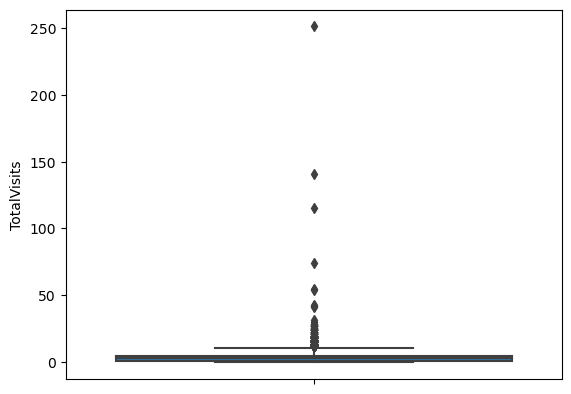

In [167]:
sns.boxplot(y=df['TotalVisits'])
plt.show()

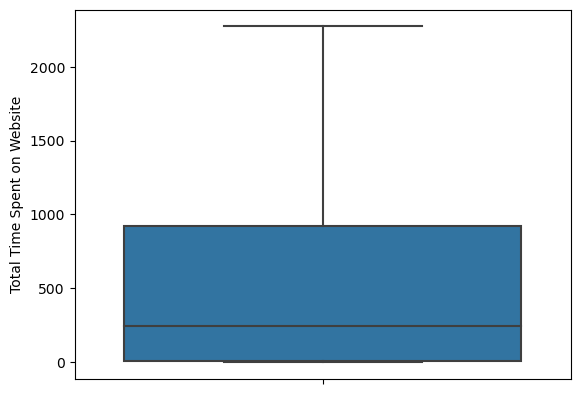

In [168]:
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

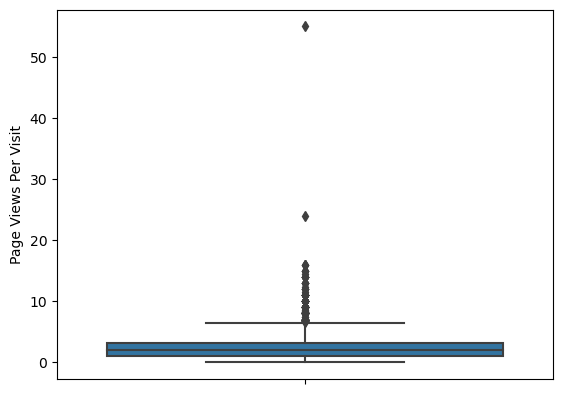

In [169]:
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

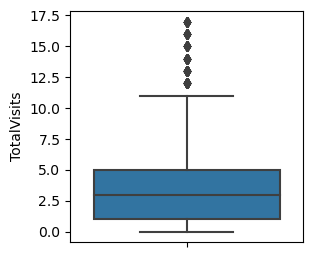

In [170]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
plt.figure(figsize = (3,3))
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

# Data Visualisation

In [171]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,not available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,not available,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,not available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,not available,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,not available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Text(0.5, 1.0, 'Lead Origin')

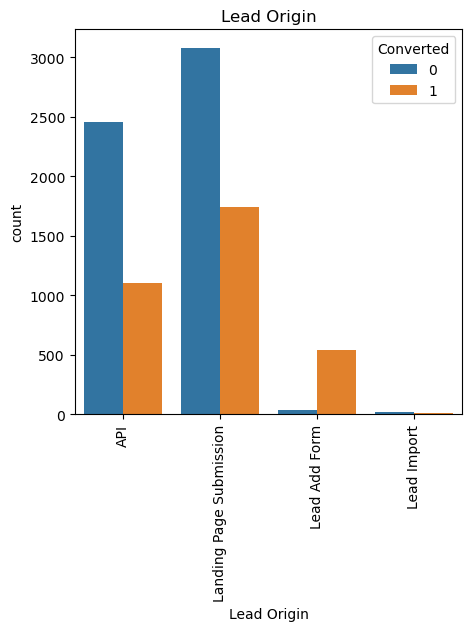

In [172]:
# Let's check the categorial variable with converted column
plt.figure(figsize = (5,5))
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

Text(0.5, 1.0, 'Lead Source')

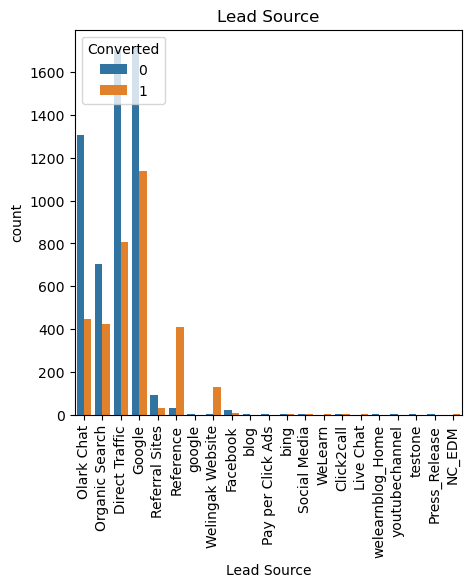

In [173]:
# Checking Lead Source
plt.figure(figsize = (5,5))
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

Text(0.5, 1.0, 'Do Not Call')

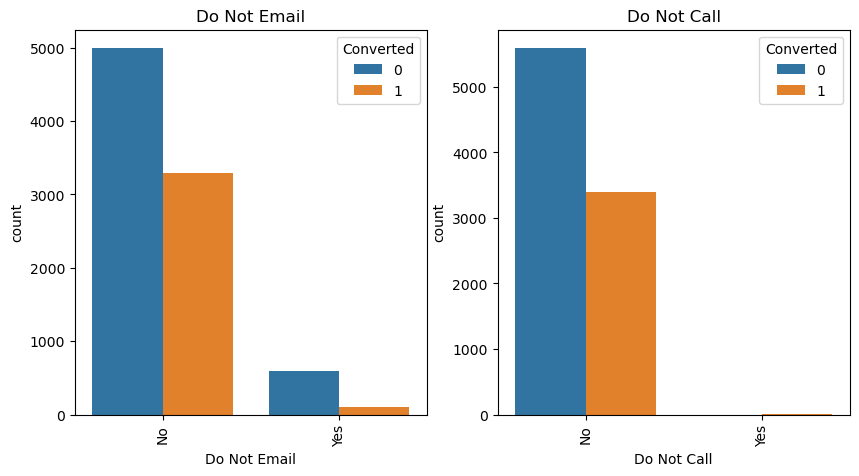

In [174]:
# Checking Do not Email & Do Not Call
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

Text(0.5, 1.0, 'Last Activity')

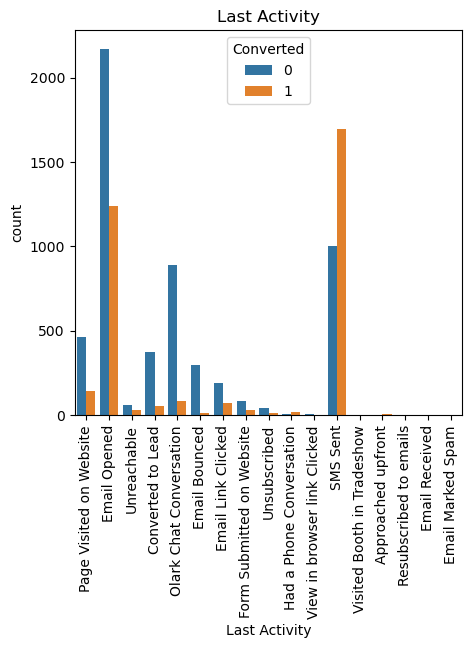

In [175]:
# Checking Last Activity
plt.figure(figsize = (5,5))
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

Text(0.5, 1.0, 'Country')

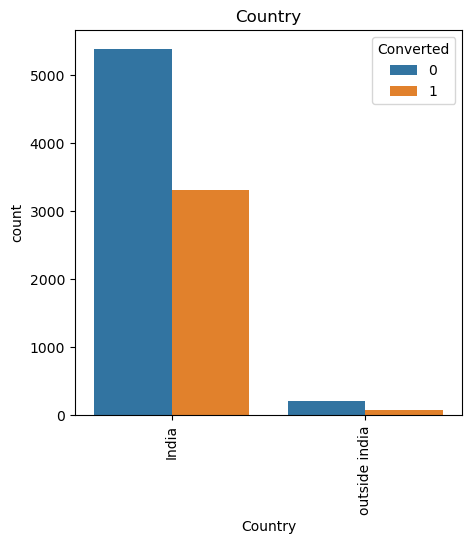

In [176]:
# Checking Country
plt.figure(figsize = (5,5))
sns.countplot(x='Country', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Country')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

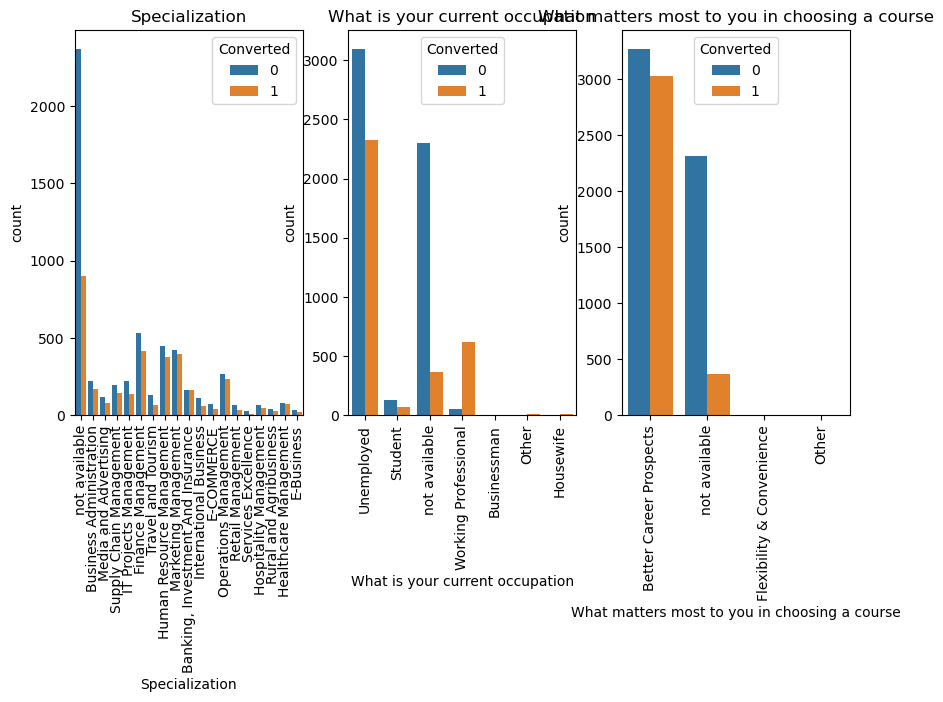

In [177]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,3,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(1,3,3)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'Digital Advertisement')

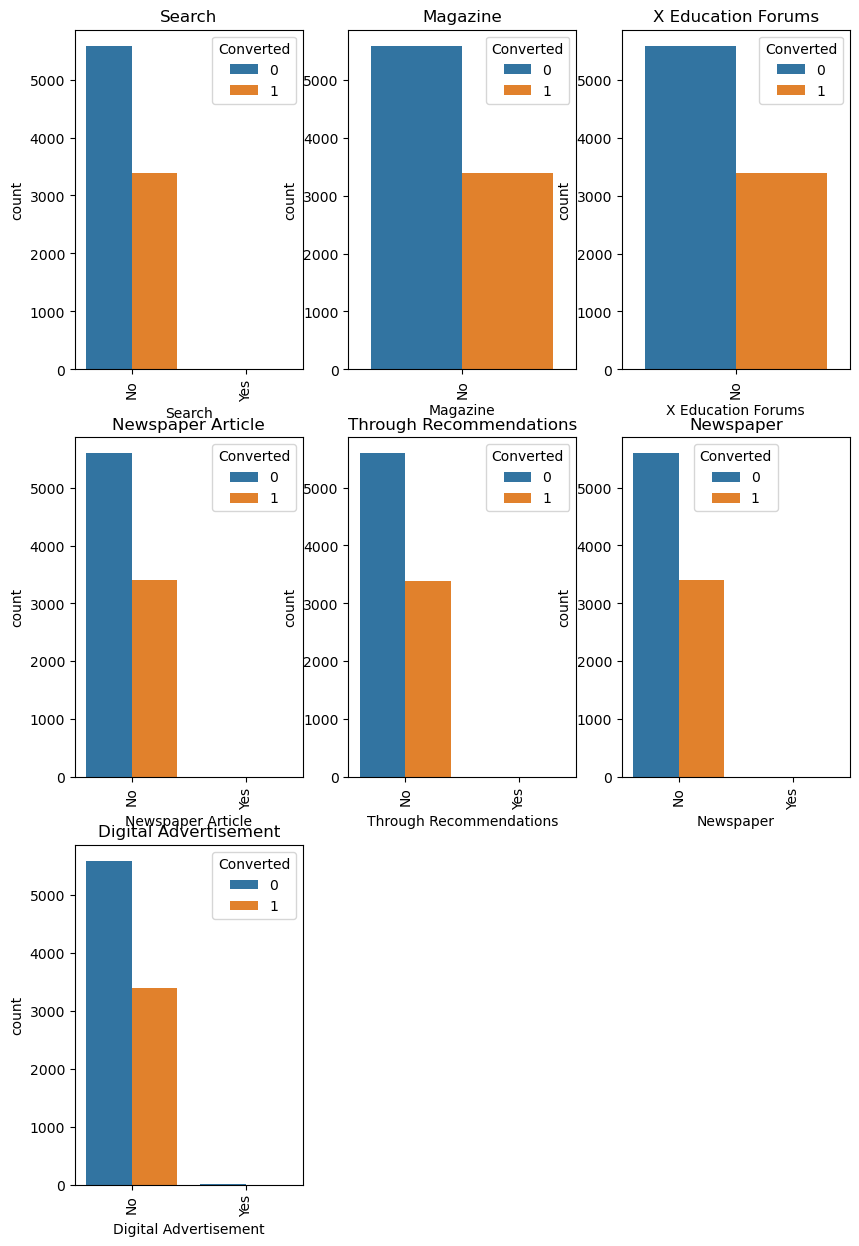

In [178]:
plt.figure(figsize = (10,15))
plt.subplot(3,3,1)
sns.countplot(x='Search', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(3,3,2)
sns.countplot(x='Magazine', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Magazine')

plt.subplot(3,3,3)
sns.countplot(x='X Education Forums', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(3,3,4)
sns.countplot(x='Newspaper Article', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(3,3,5)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(3,3,6)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(3,3,7)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

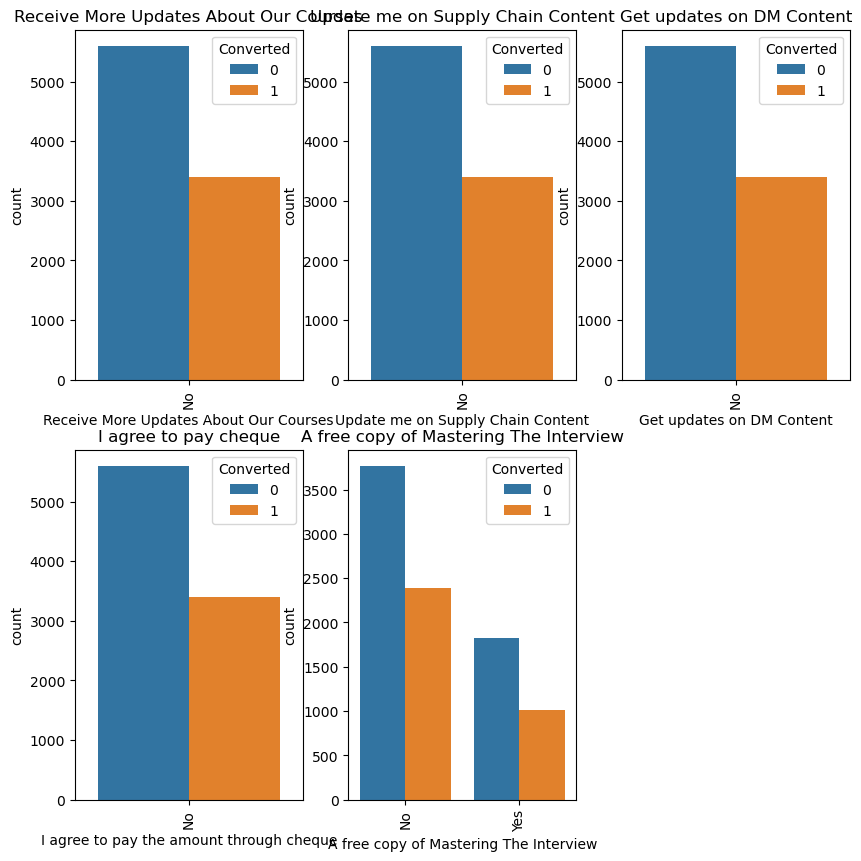

In [179]:
plt.figure(figsize = (10,10))
plt.subplot(2,3,1)
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Receive More Updates About Our Courses')

plt.subplot(2,3,2)
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Update me on Supply Chain Content')

plt.subplot(2,3,3)
sns.countplot(x='Get updates on DM Content', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')

plt.subplot(2,3,4)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('I agree to pay cheque')

plt.subplot(2,3,5)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

Text(0.5, 1.0, 'Last Notable Activity')

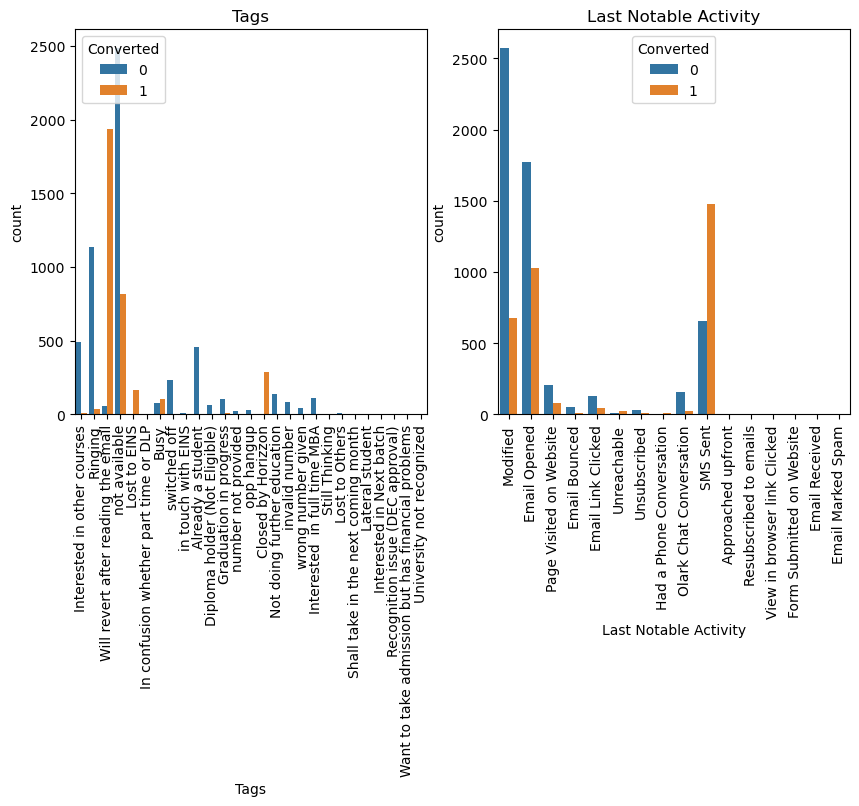

In [180]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Tags', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


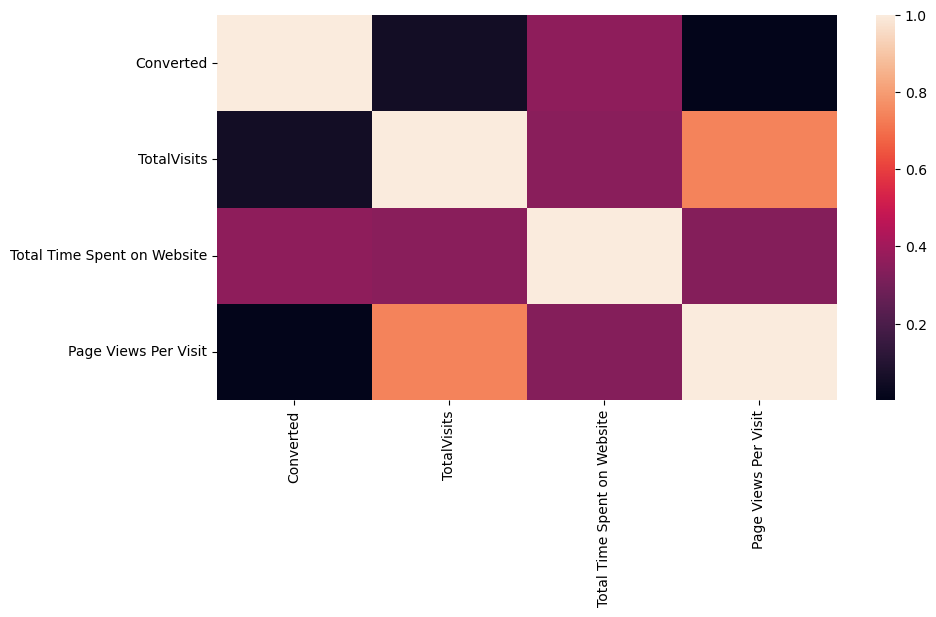

In [181]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

In [182]:
# As we can see page views per visit and Total visit are highly correlated. So we can delete one of them.
df.drop(['Page Views Per Visit'], 1, inplace = True)

In [183]:
## Based on the value counts lets drop columns which are of one type only
df = df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
             'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'], axis=1)

In [184]:
## Clubbing together low value counts as "Grouped"

df = df.replace({'Lead Source': {'Facebook':'Grouped', 'bing':'Grouped','google':'Grouped', 'Click2call':'Grouped', 'Live Chat':'Grouped',
                                          'Social Media':'Grouped', 'Press_Release':'Grouped', 'Pay per Click Ads':'Grouped',
                                          'WeLearn':'Grouped', 'WeLearn':'Grouped', 'youtubechannel':'Grouped', 'NC_EDM':'Grouped',
                                          'blog':'Grouped', 'testone':'Grouped', 'welearnblog_Home':'Grouped'}})
df['Lead Source'].value_counts()

Google              2850
Direct Traffic      2512
Olark Chat          1751
Organic Search      1125
Reference            442
Welingak Website     129
Referral Sites       123
Grouped               59
Name: Lead Source, dtype: int64

In [185]:
## Performing same activity as in Lead score to combine low value counts
df = df.replace({'Last Notable Activity':{'Had a Phone Conversation':'Grouped', 'Email Marked Spam':'Grouped','Approached upfront':'Grouped','Resubscribed to emails':'Grouped',
                                         'View in browser link Clicked':'Grouped','Form Submitted on Website':'Grouped','Email Received':'Grouped'}})
df['Last Notable Activity'].value_counts()

Modified                   3250
Email Opened               2803
SMS Sent                   2139
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Unsubscribed                 45
Unreachable                  32
Grouped                      20
Name: Last Notable Activity, dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Converted                                      8991 non-null   int64  
 4   TotalVisits                                    8991 non-null   float64
 5   Total Time Spent on Website                    8991 non-null   int64  
 6   Last Activity                                  8991 non-null   object 
 7   Country                                        8991 non-null   object 
 8   Specialization                                 8991 non-null   object 
 9   What is your current occupation                8991 

In [187]:
# We can also delete country and tags
df.drop(['Country', "Tags"], 1, inplace=True)

# Create Dummy Variables

In [188]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [189]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dummy = pd.concat([df, dummy], axis=1)
df_dummy

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not available,Lead Source_Google,Lead Source_Grouped,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not available,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Grouped,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,No,0,0.0,0,Page Visited on Website,not available,Unemployed,Better Career Prospects,not available,No,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,Email Opened,not available,Unemployed,Better Career Prospects,not available,No,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,not available,Unemployed,Better Career Prospects,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,Email Marked Spam,IT P

In [190]:
df_dummy = df_dummy.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dummy

,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not available,Lead Source_Google,Lead Source_Grouped,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not available,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Grouped,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,1532,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9236,0,2.0,238,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
9237,0,2.0,199,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
9238,1,3.0,499,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Train Test Split

In [191]:
## Importing library
from sklearn.model_selection import train_test_split

In [192]:
## Putting feature variables to X
X = df_dummy.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not available,Lead Source_Google,Lead Source_Grouped,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not available,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Grouped,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1.0,305,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [193]:
## Adding the target variable in y
y = df_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [194]:
## Splitting the dataset into 70% and 30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [195]:
## Import MinMax scaler library
from sklearn.preprocessing import MinMaxScaler
## Scaling the numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not available,Lead Source_Google,Lead Source_Grouped,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not available,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Grouped,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3523,0.117647,0.057218,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3267,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5653,0.117647,0.404049,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
5072,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3704,0.235294,0.043134,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


# Model Building

In [196]:
## Import LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [197]:
## Import RFE
from sklearn.feature_selection import RFE

In [198]:
## Import statsmodel
import statsmodels.api as sm

In [199]:
# Running RFE with variables as output
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [200]:
## Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 41),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 35),
 ('Specialization_Hospitality Management', False, 14),
 ('Specialization_Human Resource Management', False, 42),
 ('Specialization_IT Projects Management', False, 37),
 ('Specialization_International Business', False, 39),
 ('Specialization_Marketing Management', False, 27),
 ('Specialization_Media and Advertising', False, 15),
 ('Specialization_Operations Management', False, 32),
 ('Specialization_Retail Management', False, 10),
 ('Specialization_Rural and Agribusiness', False, 44),
 ('Specialization_Services Excellence', False, 21),
 ('Speci

In [201]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [202]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [203]:
## Building model 1
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
## Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.8
Date:                Fri, 14 Apr 2023   Deviance:                       4981.6
Time:                        17:16:06   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4140
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2454      0.148      1.654      0.098      -0.045       0.536
Total Time Spent on Website                              4.6536      0.173     26.834      0.000       4.314       4.994
Lead Origin_Landing Page Submission                     -0.9751      0.132     -7.376      0.000      -1.234      -0.716
Lead Origin_Lead Add Form                                3.4214      0.265     12.931      0.000       2.903       3.940
Specialization_not available                            -0.9273      0.129     -7.166      0.000      -1.181      -0.674
Lead Source_Olark Chat                                   1.1913      0.126      9.427      0.000       0.944       1.439
Lead Source_Welingak Website                             2.9433      1.041      2.826      0.005       0.902       4.985
Do Not Email_Yes                                        -1.4967      0.207     -7.228      0.000      -1.903      -1.091
Last Activity_Converted to Lead                         -0.9157      0.213     -4.303      0.000      -1.333      -0.499
Last Activity_Email Bounced                             -1.1443      0.393     -2.915      0.004      -1.914      -0.375
Last Activity_Form Submitted on Website                 -0.9936      0.377     -2.632      0.008      -1.733      -0.254
Last Activity_Olark Chat Conversation                   -1.4266      0.202     -7.060      0.000      -1.823      -1.031
What is your current occupation_Housewife               21.9682   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
What is your current occupation_Working Professional     2.4070      0.194     12.388      0.000       2.026       2.788
What is your current occupation_not available           -0.9834      0.090    -10.986      0.000      -1.159      -0.808
Last Notable Activity_Email Link Clicked                -1.8793      0.269     -6.991      0.000      -2.406      -1.352
Last Notable Activity_Email Opened                      -1.3383      0.090    -14.801      0.000      -1.516      -1.161
Last Notable Activity_Grouped                            2.2353      1.187      1.882      0.060      -0.092       4.563
Last Notable Activity_Modified                          -1.5064      0.106    -14.229      0.000      -1.714      -1.299
Last Notable Activity_Olark Chat Conversation           -1.0606      0.382     -2.779      0.005      -1.809      -0.313
Last Notable Activity_Page Visited on Website           -1.6800      0.208     -8.096      0.000      -2.087      -1.273
========================================================================================================================
"""

In [204]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [205]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.05
17,Last Notable Activity_Modified,3.04
3,Specialization_not available,2.83
10,Last Activity_Olark Chat Conversation,2.12
4,Lead Source_Olark Chat,2.09
15,Last Notable Activity_Email Opened,1.98
0,Total Time Spent on Website,1.98
6,Do Not Email_Yes,1.92
8,Last Activity_Email Bounced,1.85
13,What is your current occupation_not available,1.64


VIF value are seems quiet Ok but the p value of What is your current occupation_Housewife & Last Notable Activity_Grouped is higher side so drop it.

In [206]:
X_train.drop(['What is your current occupation_Housewife', 'Last Notable Activity_Grouped'], axis = 1, inplace = True)

In [207]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.9
Date:                Fri, 14 Apr 2023   Deviance:                       4991.9
Time:                        17:16:08   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4130
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2600      0.148      1.757      0.079      -0.030       0.550
Total Time Spent on Website                              4.6521      0.173     26.863      0.000       4.313       4.992
Lead Origin_Landing Page Submission                     -0.9767      0.132     -7.399      0.000      -1.235      -0.718
Lead Origin_Lead Add Form                                3.4412      0.264     13.017      0.000       2.923       3.959
Specialization_not available                            -0.9343      0.129     -7.226      0.000      -1.188      -0.681
Lead Source_Olark Chat                                   1.1917      0.126      9.435      0.000       0.944       1.439
Lead Source_Welingak Website                             2.9229      1.041      2.807      0.005       0.882       4.964
Do Not Email_Yes                                        -1.4971      0.206     -7.261      0.000      -1.901      -1.093
Last Activity_Converted to Lead                         -0.9171      0.213     -4.310      0.000      -1.334      -0.500
Last Activity_Email Bounced                             -1.1504      0.392     -2.933      0.003      -1.919      -0.382
Last Activity_Form Submitted on Website                 -0.9404      0.375     -2.505      0.012      -1.676      -0.205
Last Activity_Olark Chat Conversation                   -1.4271      0.202     -7.062      0.000      -1.823      -1.031
What is your current occupation_Working Professional     2.4029      0.194     12.373      0.000       2.022       2.784
What is your current occupation_not available           -0.9819      0.089    -10.980      0.000      -1.157      -0.807
Last Notable Activity_Email Link Clicked                -1.8815      0.267     -7.037      0.000      -2.405      -1.357
Last Notable Activity_Email Opened                      -1.3470      0.090    -14.921      0.000      -1.524      -1.170
Last Notable Activity_Modified                          -1.5158      0.106    -14.342      0.000      -1.723      -1.309
Last Notable Activity_Olark Chat Conversation           -1.0698      0.382     -2.803      0.005      -1.818      -0.322
Last Notable Activity_Page Visited on Website           -1.6917      0.207     -8.154      0.000      -2.098      -1.285
========================================================================================================================
"""

In [208]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.05
15,Last Notable Activity_Modified,3.03
3,Specialization_not available,2.82
10,Last Activity_Olark Chat Conversation,2.12
4,Lead Source_Olark Chat,2.08
14,Last Notable Activity_Email Opened,1.98
0,Total Time Spent on Website,1.97
6,Do Not Email_Yes,1.92
8,Last Activity_Email Bounced,1.85
12,What is your current occupation_not available,1.64


Now we can see that all the Pvalues are below 0.05 and VIF values are below 5. SO we can fix that model

# Doing prediction

In [209]:
## Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.550358
3267    0.996631
5653    0.454111
5072    0.140459
3704    0.134342
1790    0.025711
2482    0.206199
1694    0.121290
8768    0.118316
9225    0.008762
dtype: float64

In [210]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55035789, 0.99663105, 0.45411073, 0.14045862, 0.13434234,
       0.02571055, 0.20619914, 0.12128976, 0.11831576, 0.00876235])

In [211]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.550358
1,1,0.996631
2,1,0.454111
3,0,0.140459
4,0,0.134342


In [213]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.550358,1
1,1,0.996631,1
2,1,0.454111,0
3,0,0.140459,0
4,0,0.134342,0


# Model Evaluation

In [214]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [215]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3494,  421],
       [ 708, 1670]], dtype=int64)

In [216]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8205943111393612

So, the accuracy level is quiet good. Now check senstivity ans specificity

In [217]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [218]:
# Calculating the sensitivity
TP/(TP+FN)

0.7022708158116064

In [219]:
# Calculating the specificity
TN/(TN+FP)

0.8924648786717753

So, as per the above the accuracy is 82%, the senstivity is about 70 and the specificity is about 89.
So the readings are quiet good

In [220]:
## Illustration of model with ROC curve
def curve_roc(actual, probs):
  fpr,tpr,thresholds = metrics.roc_curve(actual, probs,drop_intermediate = False)
  auc_score = metrics.roc_auc_score( actual, probs)
  plt.figure(figsize=(4,4))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1],'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
  return None

In [222]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

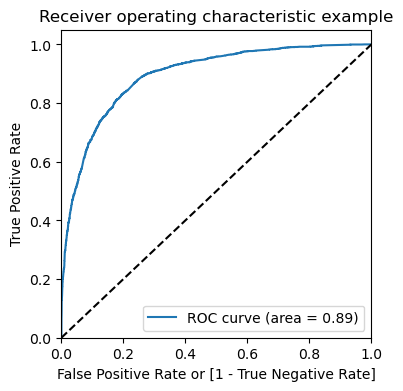

In [224]:
# Call the ROC function
curve_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.89 which is quiet good.

In [225]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.550358,1,1,1,1,1,1,1,0,0,0,0
1,1,0.996631,1,1,1,1,1,1,1,1,1,1,1
2,1,0.454111,0,1,1,1,1,1,0,0,0,0,0
3,0,0.140459,0,1,1,0,0,0,0,0,0,0,0
4,0,0.134342,0,1,1,0,0,0,0,0,0,0,0


In [226]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.626410,0.973507,0.415581
0.2,0.2,0.767837,0.912532,0.679949
0.3,0.3,0.804227,0.867536,0.765773
0.4,0.4,0.818687,0.778806,0.842912
0.5,0.5,0.820594,0.702271,0.892465
0.6,0.6,0.810901,0.626997,0.922605
0.7,0.7,0.788177,0.521026,0.950447
0.8,0.8,0.768314,0.436501,0.969860
0.9,0.9,0.729064,0.304458,0.986973


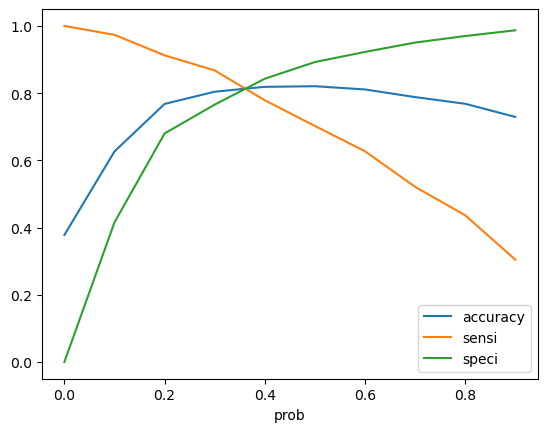

In [227]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [228]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.550358,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996631,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.454111,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.140459,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.134342,0,1,1,0,0,0,0,0,0,0,0,0


In [229]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8145558557126966

In [230]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3178,  737],
       [ 430, 1948]], dtype=int64)

In [231]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [232]:
# Calculating the sensitivity
TP/(TP+FN)

0.8191757779646762

In [233]:
# Calculating the specificity
TN/(TN+FP)

0.8117496807151979

# Checking Test Set

In [234]:
 #Scaling numeric values
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])


In [235]:
col = X_train.columns

In [236]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_not available,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What is your current occupation_not available,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.050176,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4421,1.0,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.547975,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2169,1.0,0.390405,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.218310,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.227113,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8378,1.0,0.179577,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1263,1.0,0.376320,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [237]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.058978
1,1,0.810261
2,1,0.354262
3,0,0.032067
4,0,0.226276


In [238]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.058978,0
1,1,0.810261,1
2,1,0.354262,1
3,0,0.032067,0
4,0,0.226276,0
...,...,...,...
2693,1,0.105836,0
2694,1,0.702917,1
2695,0,0.044356,0
2696,1,0.968836,1


In [239]:
# Check the accuracy level
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8117123795404003

In [240]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1351,  326],
       [ 182,  839]], dtype=int64)

In [241]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [242]:
# Calculate sensitivity
TP/(TP+FN)

0.821743388834476

In [243]:
# Calculate specificity
TN/(TN+FP)

0.8056052474657126

As we can see, the accuracy is 81%, the senstivity is 82% and the specificity is 80%

 Precision & Recall

In [244]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3494,  421],
       [ 708, 1670]], dtype=int64)

In [245]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7986609277857485

In [246]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7022708158116064

So, the precision is 80 and the recall value is 70

Recall tradeoff

In [247]:
from sklearn.metrics import precision_recall_curve

In [248]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [249]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

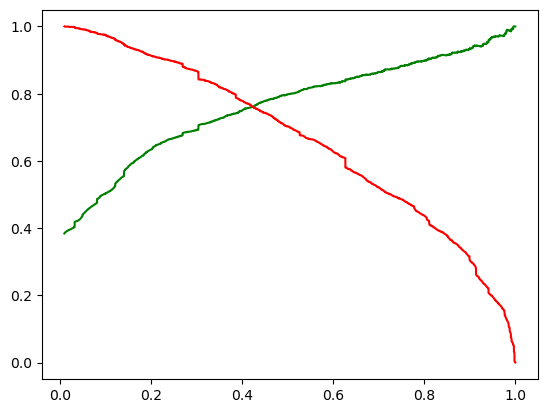

In [250]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [251]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.550358,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996631,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.454111,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.140459,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.134342,0,1,1,0,0,0,0,0,0,0,0,0


In [252]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8199586842523439

In [253]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3326,  589],
       [ 544, 1834]], dtype=int64)

In [254]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [255]:
# Precision
TP / (TP + FP)

0.7569129178704086

In [256]:
#Recall
TP / (TP + FN)

0.7712363330529857

So, with current cut off of approx. 4 the accuracy is 82%, Precision is 75% and the recall is 77%

# Test set prediction

In [257]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.058978
1,1,0.810261
2,1,0.354262
3,0,0.032067
4,0,0.226276


In [258]:
# Making prediction using cut off 0.40
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.058978,0
1,1,0.810261,1
2,1,0.354262,0
3,0,0.032067,0
4,0,0.226276,0
...,...,...,...
2693,1,0.105836,0
2694,1,0.702917,1
2695,0,0.044356,0
2696,1,0.968836,1


In [260]:
# Check accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8143068939955522

In [261]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1399,  278],
       [ 223,  798]], dtype=int64)

In [262]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [263]:
# Precision 
TP / (TP + FP)

0.741635687732342

In [264]:
#Recall
TP / (TP + FN)

0.781586679725759

So, with the current cut off of 40 approx. the accuracy is 81%, precision is 74% and the recall is 78%

So, we can saythe above model is working fine and will be helpfull in identifying the hot leads

So, As per the below we can define the lead in three categories Cold Leads, Warm Leads and Hot Leads 

In [266]:
lead_type=[]
for i in range(len(y_pred_final)):
    if y_pred_final.Conversion_Prob[i] <=35:
        lead_type.append("Cold Leads")
    elif y_pred_final.Conversion_Prob[i] >35 & y_pred_final.Conversion_Prob[i] <=70:
        lead_type.append("Warm Leads")
    else:
        lead_type.append("Hot Leads")
